In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
from astropy.visualization import (MinMaxInterval,
                                  PercentileInterval,
                                  LogStretch,
                                  ImageNormalize)



In [2]:

### replace your path to the folder containing the fits files you'll be using
image_path = '/Users/hph/Dropbox/astrophys/CMZoom/multipanel/'
### define a save path
save_path  = image_path

### replace your path to the folder containing a countour file (if you're using one)
contour_path = '/Users/hph/Dropbox/astrophys/CMZoom/cmzoom_catalog/catalog_acc/'


In [3]:
### The particular naming scheme is not relevant to you probably
### load in the fits hdus for each file
### this assumes all data are 2D and on the same pixel grid.

### define frequencies used (just for file naming scheme)
f1_string = 'f8um'
f2_string = 'f37um'
f3_string = 'f70um'
r1_string = 'arches'

### f1 becomes blue
### f2 becoms green
### f3 becomes red
region1_f1_hdus = fits.open(image_path+'cutouts/cmz_'+r1_string+'_'+f1_string+'.fits')
region1_f2_hdus = fits.open(image_path+'cutouts/cmz_'+r1_string+'_'+f2_string+'.fits')
region1_f3_hdus = fits.open(image_path+'cutouts/cmz_'+r1_string+'_'+f3_string+'.fits')

### construct the wcs from one of them (they should all be the same, right?)
r1wcs = WCS(region1_f1_hdus[0])

/var/folders/5j/kk60b8j15ljg_0ddrg10l6100000gn/T/ipykernel_88459/1302288143.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=r1wcs)


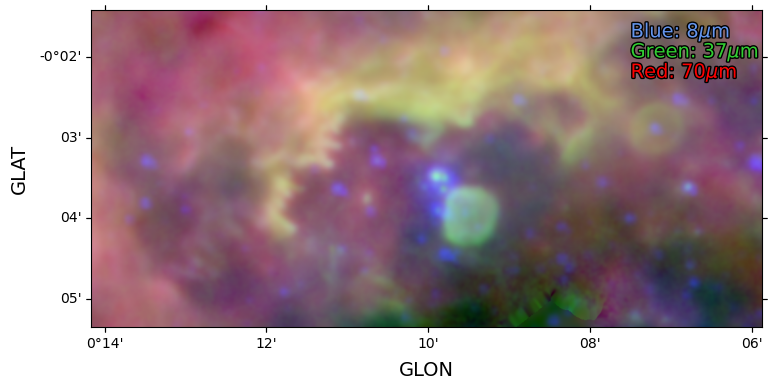

In [4]:
### Time to make the figure!
fig, axes = plt.subplots(figsize=(8,4))

### Ok here's the fun part: we need to find a normalization for each color that makes it look
### good. This can be tricky, so try messing around with it for your images.
### Chances are, the default won't be great for you unless you're very lucky.
b = ImageNormalize(region1_f1_hdus[0].data,stretch=LogStretch(a=200),interval=MinMaxInterval())(region1_f1_hdus[0].data)
g = ImageNormalize(region1_f2_hdus[0].data,stretch=LogStretch(a=18),interval=MinMaxInterval())(region1_f2_hdus[0].data)
r = ImageNormalize(region1_f3_hdus[0].data,stretch=LogStretch(a=15),interval=MinMaxInterval())(region1_f3_hdus[0].data)

### Now we create the axes object with our correct projection
ax = plt.subplot(111, projection=r1wcs)
### here's the call to actually make the rgb figure using make_lupton_rgb instead of aplpy
rgb_default = make_lupton_rgb(r, g, b ,stretch=1,Q=1.0)
### Now actually show the grid using imshow
ax.imshow(rgb_default, origin='lower')
### Then label axes
ax.set_xlabel('GLON',fontsize=14)
ax.set_ylabel('GLAT',fontsize=14)

### Now I add just some nice path effects to make the label text legible
### I suggest changing out the frequency labels for the frequencies of your images
ax.text(s='Blue: 8$\mu$m',x=800,y=430,color='cornflowerblue',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")],
        fontsize=14)
ax.text(s='Green: 37$\mu$m',x=800,y=400,color='limegreen',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")],
        fontsize=14)
ax.text(s='Red: 70$\mu$m',x=800,y=370,color='red',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")],
        fontsize=14)

### why not
plt.tight_layout()

### then save!
plt.savefig(save_path+"figures/arches_gal.png",dpi=200)
